In [3]:
# auto reload when source code changes
%load_ext autoreload
%autoreload 2

# include  folder in path
import os, sys, math
import numpy as np
import pandas as pd

sys.path.append('../sanode') # Adds higher directory to python modules path.

import aicsPlot

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk") # ('notebook', paper', 'talk', 'poster')
plt.style.use("dark_background")


/home/cudmore/anaconda3/envs/sanode-env/lib/python3.6/site-packages/skan/csr.py:21: NumbaDeprecationWarning:

The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.



   SAN1 [21.256964273856198, 19.0087801314828]
   SAN2 [28.1569735128783, 20.692985659913102]
   SAN3 [15.486733644986801, 12.685823140878401]
   SAN4 [23.742719589632202, 14.5016489064581]
   SAN7 [20.6944223484848, 13.4186079545455]
  superiorList: [21.256964273856198, 28.1569735128783, 15.486733644986801, 23.742719589632202, 20.6944223484848]
  inferiorList: [19.0087801314828, 20.692985659913102, 12.685823140878401, 14.5016489064581, 13.4186079545455]


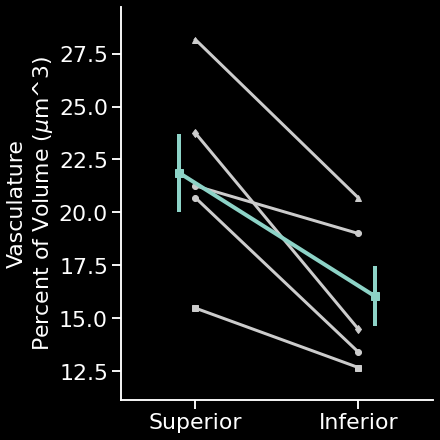

mean:21.87 sd:4.14 sem:1.85 n:5 min:15.49 max:28.16 median:21.26
mean:16.06 sd:3.19 sem:1.43 n:5 min:12.69 max:20.69 median:14.50
wilcoxon stat: 15.0 p: 0.03125


(0.0, 30.0)

In [4]:
# Density-Result-ch{channel}.csv is created with 'python aicsMaskDen.py'
channel = 2
csvFile = f'Density-Result-ch{channel}.csv'
superiorList, inferiorList, ax = aicsPlot.plotMaskDensity(channel=channel, csvFile=csvFile)

ax.set_ylim([0, 30])

# append mean +/- se


In [5]:
# do stats on return from aicsPlot.plotMaskDensity

def getStats(theList):
    theMean = np.nanmean(theList)
    theStd = np.nanstd(theList)
    theN = len(theList)
    theSem = theStd / math.sqrt(theN)
    return theMean, theStd, theN, theSem

# get mean/sd/n from each superior/inferior
sMean, sStd, sSem, sN = getStats(superiorList)
iMean, iStd, iSem, iN = getStats(inferiorList)

# do stats
import scipy
alternative = 'greater' #(“two-sided”, “greater”, “less”)
mode = 'exact'
stat, pValue = scipy.stats.wilcoxon(x=superiorList, y=inferiorList, alternative=alternative, mode=mode)
print('superiorList:\t', superiorList)
print('inferiorList:\t', inferiorList)
print('wilcoxon pValue:\t', pValue)

stat, pValue = scipy.stats.ttest_rel(superiorList, inferiorList)
print('paired ttest pValue:\t', pValue)


superiorList:	 [21.256964273856198, 28.1569735128783, 15.486733644986801, 23.742719589632202, 20.6944223484848]
inferiorList:	 [19.0087801314828, 20.692985659913102, 12.685823140878401, 14.5016489064581, 13.4186079545455]
wilcoxon pValue:	 0.03125
paired ttest pValue:	 0.013803786629753201


SAN1 [2.61792230606079, 3.93526744842529]
SAN2 [2.7070512771606405, 4.31861019134522]
SAN3 [3.00351452827454, 8.01746940612793]
SAN4 [2.67742156982422, 4.97184705734253]
SAN7 [2.0774462223053, 3.89873814582825]


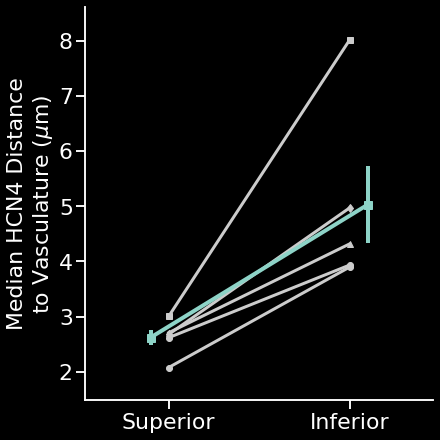

mean:2.62 sd:0.30 sem:0.13 n:5 min:2.08 max:3.00 median:2.68
mean:5.03 sd:1.54 sem:0.69 n:5 min:3.90 max:8.02 median:4.32
wilcoxon stat: 0.0 p: 0.03125


(0.0, 10.0)

In [6]:
# this requires a file
#os.path.isfile('saNode/notebooks/hcn4-Distance-Result.csv')

#superiorList, inferiorList, ax = aicsPlot.plotMeanDist(csvFile='hcn4-Distance-Result.csv', statCol='mean')

superiorList, inferiorList, ax = aicsPlot.plotMeanDist(csvFile='hcn4-Distance-Result.csv', statCol='median')
ax.set_ylim([0, 10])

In [7]:
# do stats on return from aicsPlot.plotMaskDensity

def getStats(theList):
    theMean = np.nanmean(theList)
    theStd = np.nanstd(theList)
    theN = len(theList)
    theSem = theStd / math.sqrt(theN)
    return theMean, theStd, theN, theSem

# get mean/sd/n from each superior/inferior
sMean, sStd, sSem, sN = getStats(superiorList)
iMean, iStd, iSem, iN = getStats(inferiorList)

print('superiorList:\t', superiorList)
print('inferiorList:\t', inferiorList)

# do stats
import scipy
alternative = 'less' #(“two-sided”, “greater”, “less”)
mode = 'exact'
stat, pValue = scipy.stats.wilcoxon(x=superiorList, y=inferiorList, alternative=alternative, mode=mode)
print('wilcoxon pValue:\t', pValue)

stat, pValue = scipy.stats.ttest_rel(superiorList, inferiorList)
print('paired ttest pValue:\t', pValue)


superiorList:	 [2.61792230606079, 2.7070512771606405, 3.00351452827454, 2.67742156982422, 2.0774462223053]
inferiorList:	 [3.93526744842529, 4.31861019134522, 8.01746940612793, 4.97184705734253, 3.89873814582825]
wilcoxon pValue:	 0.03125
paired ttest pValue:	 0.02274198376923472


In [8]:
# hcn4Dist.csv is distance from each hcn4 pixel to nearest vasculature
# there are approx 11,000,000 pixels per san
# hcn4Dist.csv is a random sample of 1,000,000 (for each san)

# load hcn4Dist.csv


path = 'hcn4Dist.csv'
df = pd.read_csv(path)

display(df)

,Unnamed: 0,SAN,headMidTail,hcn4DistToVasc,file
0,0,SAN1,head,7.228958,SAN1_head_ch2
1,1,SAN1,head,1.257788,SAN1_head_ch2
2,2,SAN1,head,3.791953,SAN1_head_ch2
3,3,SAN1,head,0.397748,SAN1_head_ch2
4,4,SAN1,head,4.804174,SAN1_head_ch2
...,...,...,...,...,...
599995,599995,SAN4,tail,3.183535,SAN4_tail_ch2
599996,599996,SAN4,tail,13.613483,SAN4_tail_ch2
599997,599997,SAN4,tail,14.349615,SAN4_tail_ch2
599998,599998,SAN4,tail,2.233556,SAN4_tail_ch2


,count,mean,std,min,25%,50%,75%,max
headMidTail,,,,,,,,
head,50000.0,3.874201,3.858256,0.397748,1.434099,2.668172,4.761705,23.967838
tail,50000.0,5.132446,3.788342,0.397748,2.226001,4.283873,7.136095,23.755798


Mann Whitney U:	 0.0


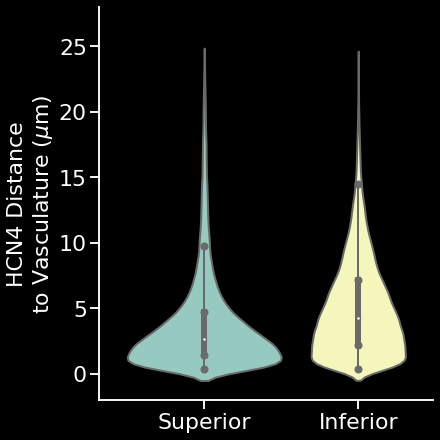

In [9]:
sanStr = 'SAN2'
regionList = ['tail', 'head'] # to get logical order head-tail in plot
regionListLabel = ['Superior', 'Inferior'] #swapped, to do: figure this out

df2 = df[ df['SAN'] == sanStr]
df2 = df2[ df2['headMidTail'].isin(regionList) ]

#
# get stats
tmpDf = df2.groupby('headMidTail')['hcn4DistToVasc'].describe()
display(tmpDf)

headData = df2[ df2['headMidTail']== 'head' ]['hcn4DistToVasc'].tolist()
#headData = [x for x in headData if not np.isnan(x)]
tailData = df2[ df2['headMidTail']== 'tail' ]['hcn4DistToVasc'].tolist()
#tailData = [x for x in tailData if not np.isnan(x)]

statistic1, p1 = scipy.stats.mannwhitneyu(headData, tailData) #, alternative='two-sided')
print('Mann Whitney U:\t', p1)

#
# plot
fig, ax = plt.subplots(1, figsize=(6, 6))

split = False
linewidth = 2
ax = sns.violinplot(ax=ax, x="SAN", y="hcn4DistToVasc", hue='headMidTail', linewidth=linewidth, split=split, data=df2)

ax.set_ylabel('HCN4 Distance\nto Vasculature ($\mu$m)')
ax.set_xlabel('')
ax.margins(x=0.1, y=0.1)
regionList2 = ['Head', 'Tail']
plt.xticks([-0.2, .2], regionListLabel)
#plt.xticks([])
ax.set_ylim([-2, 28])

plt.legend(frameon=False)
ax.get_legend().remove()

In [13]:
# SAN2
if 0:
    pathList = [
        '/media/cudmore/data1/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif',
        '/media/cudmore/data1/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif',
        '/media/cudmore/data1/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif',
        ]

# SAN3
if 0:
    pathList = [
        '/media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
        #'/media/cudmore/data1/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
        '/media/cudmore/data1/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
        ]
# SAN4
if 1:
    pathList = [
        '/media/cudmore/data1/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif',
        '/media/cudmore/data1/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif',
        '/media/cudmore/data1/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif',
        ]


In [14]:
## Plot histograms of slab diameters

****** bStackHeader.loadHeader() got xVoxel: 0.6214808646041788 yVoxel: 0.6214808646041788
=== bVascularTracing.load() /media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.h5f
    loaded nodes: 670 edges: 854 slabs: 19868 in 0.12 seconds
****** bStackHeader.loadHeader() got xVoxel: 0.6214808646041788 yVoxel: 0.6214808646041788
=== bVascularTracing.load() /media/cudmore/data1/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.h5f
    loaded nodes: 255 edges: 272 slabs: 13199 in 0.04 seconds
1 path:/media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif
  x/y/z voxel size:[0.6214808646041788, 0.6214808646041788, 1]
mean:5.60 sd:2.12 sem:0.02 n:14345 min:1.86 max:14.29 median:4.97
2 path:/media/cudmore/data1/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif
  x/y/z voxel size:[0.6214808646041788, 0.6214808646041788, 1]
mean:5.44 sd:1.90 sem:0.02 n:10992 min:1.86 max:14.29 median:4.97
  aicsPlot.plotSlabDiamList() theDiameters: 14345


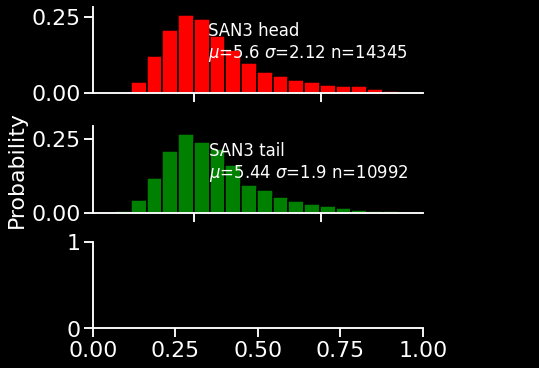

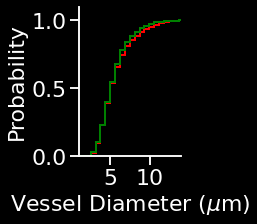

In [18]:

aicsPlot.plotSlabDiamHist(pathList)

## ToDo: Add SAN7 to this

In [25]:
# get the mean/sd/n of edge diameters
# SAN2
tmpPathList = []
tmpPathList += [
    '/media/cudmore/data1/san-density/SAN1/SAN1_head/aicsAnalysis/SAN1_head_ch2.tif',
    #'/media/cudmore/data1/san-density/SAN1/SAN1_mid/aicsAnalysis/SAN1_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN1/SAN1_tail/aicsAnalysis/SAN1_tail_ch2.tif',
    ]
tmpPathList += [
    '/media/cudmore/data1/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif',
    #'/media/cudmore/data1/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif',
    ]
# SAN3
tmpPathList += [
    '/media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
    #'/media/cudmore/data1/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
    ]
# SAN4
tmpPathList += [
    '/media/cudmore/data1/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif',
    #'/media/cudmore/data1/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif',
    ]

meanList, sdList, medianList, nList, axs, cumAxis = aicsPlot.plotEdgeDiamHist(tmpPathList, doPlot=False)

print('mean:', meanList)
print('sd:', sdList)
print('median:', medianList)
print('n:', nList)


plotEdgeDiamHist():
****** bStackHeader.loadHeader() got xVoxel: 0.3977476346942534 yVoxel: 0.3977476346942534
=== bVascularTracing.load() /media/cudmore/data1/san-density/SAN1/SAN1_head/aicsAnalysis/SAN1_head_ch2.h5f
    loaded nodes: 1795 edges: 2189 slabs: 54377 in 0.3 seconds
  aicsPlot.plotEdgeDiamHist() taking random sample for idx 0, n= 217
    I have hard coded numInTail=127 ... MAY BREAK ON OTHER STACKS !!!
****** bStackHeader.loadHeader() got xVoxel: 0.3977476346942534 yVoxel: 0.3977476346942534
=== bVascularTracing.load() /media/cudmore/data1/san-density/SAN1/SAN1_tail/aicsAnalysis/SAN1_tail_ch2.h5f
    loaded nodes: 1437 edges: 1813 slabs: 64298 in 0.24 seconds
!!! !!! !!! bPyQtPlot.plotEdgeDiamHist() is not plotting Diam2, it is all np.nan, path: /media/cudmore/data1/san-density/SAN1/SAN1_tail/aicsAnalysis/SAN1_tail_ch2.tif
****** bStackHeader.loadHeader() got xVoxel: 0.3977476346942534 yVoxel: 0.3977476346942534
=== bVascularTracing.load() /media/cudmore/data1/san-density

headMeanList:	 [6.01, 6.16, 7.47, 6.64]
tailMeanList:	 [nan, 5.93, 7.2, 6.15]
[0.32870959827787194, 0.3918474759960111]


(2.0, 10.0)

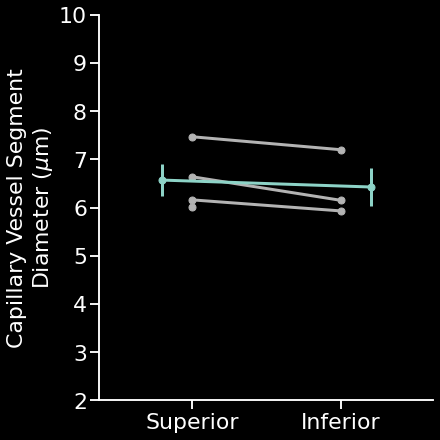

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# copy/pase mean diam from above
san1_meanDiam = [6.01, np.nan]
san2_meanDiam = [6.16, 5.93]
san3_meanDiam = [7.47, 7.2]
san4_meanDiam = [6.64, 6.15]

headMeanList = [san1_meanDiam[0], san2_meanDiam[0], san3_meanDiam[0], san4_meanDiam[0]]
tailMeanList = [san1_meanDiam[1], san2_meanDiam[1], san3_meanDiam[1], san4_meanDiam[1]]

print('headMeanList:\t', headMeanList)
print('tailMeanList:\t', tailMeanList)

headGranMean = np.nanmean(headMeanList)
tailGrandMean = np.nanmean(tailMeanList)

headGranSem = scipy.stats.sem(headMeanList, nan_policy='omit')
tailGrandSem = scipy.stats.sem(tailMeanList, nan_policy='omit')

grandMean = [headGranMean, tailGrandMean]
grandSem = [headGranSem, tailGrandSem]

print(grandSem)

#aicsPlot.defaultPlotLayout()

fig, ax = plt.subplots(1, figsize=(6,6))

ax.plot(san1_meanDiam, color='0.7')
ax.plot(san2_meanDiam, color='0.7')
ax.plot(san3_meanDiam, color='0.7')
ax.plot(san4_meanDiam, color='0.7')

xPlot = [-0.2, 1.2]
ax.errorbar(x=xPlot, y=grandMean, yerr=grandSem)

ax.set_ylabel('Capillary Vessel Segment\nDiameter ($\mu$m)')
plt.xticks([0, 1], ['Superior', 'Inferior'])

plt.ylim(2, 10)

plotEdgeDiamHist():
****** bStackHeader.loadHeader() got xVoxel: 0.6214808646041788 yVoxel: 0.6214808646041788
=== bVascularTracing.load() /media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.h5f
    loaded nodes: 670 edges: 854 slabs: 19868 in 0.12 seconds


No handles with labels found to put in legend.
No handles with labels found to put in legend.


  aicsPlot.plotEdgeDiamHist() taking random sample for idx 0, n= 217
    I have hard coded numInTail=127 ... MAY BREAK ON OTHER STACKS !!!
****** bStackHeader.loadHeader() got xVoxel: 0.6214808646041788 yVoxel: 0.6214808646041788
=== bVascularTracing.load() /media/cudmore/data1/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.h5f
    loaded nodes: 255 edges: 272 slabs: 13199 in 0.04 seconds
  minNumberOfSlabs: 5
1 path:/media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif
  x/y/z voxel size:[0.6214808646041788, 0.6214808646041788, 1]
mean:6.18 sd:2.04 sem:0.14 n:217 min:2.90 max:13.05 median:5.64
2 path:/media/cudmore/data1/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif
  x/y/z voxel size:[0.6214808646041788, 0.6214808646041788, 1]
mean:5.95 sd:2.05 sem:0.14 n:217 min:2.75 max:14.29 median:5.44
setting hist y-axis to [0,0.42] for san3
2 0 217 217 tab:blue
setting hist y-axis to [0,0.42] for san3
2 1 217 217 tab:orange


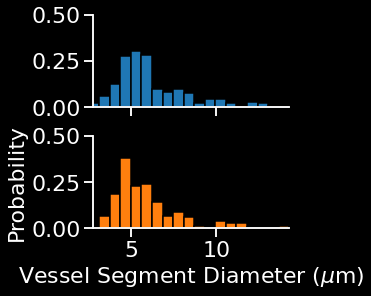

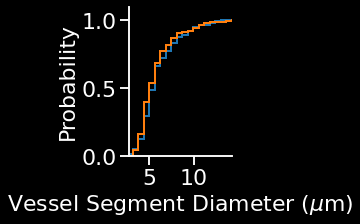

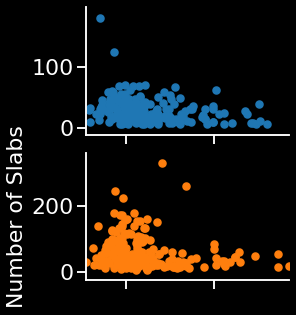

In [27]:

tmpPathList2 = [
    '/media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
    #'/media/cudmore/data/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
    ]

meanList, sdList, medianList, nList, axs, cumAxis = aicsPlot.plotEdgeDiamHist(tmpPathList2)

## Plot the distribution of HCN4 distance to Vasculature

- X-Axis values are the distance of each HCN4 pixel to the nearest vasculature
- Each pixel in HCN4 mask contibutes n=1 to the histogram
- For some dataset (e.g. San3 and San4) I am getting 2x peaks in the distribution. This is due to HCN4 positive cells in regions where there is simple no vasculature


In [28]:
# try and average cumulative hist across san 1/2/3/4
goodDistList = []

# san2
pathList = [
    '/media/cudmore/data1/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif',
    '/media/cudmore/data1/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif',
    ]

goodDist = aicsPlot.plot_hcn4_dist_hist(pathList, doPlot=False)
    # goodDist is a list where list[i] are all distances (make cum hist from this)
goodDistList.append(goodDist)

# san3
pathList = [
    '/media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
    '/media/cudmore/data1/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
    ]

goodDist = aicsPlot.plot_hcn4_dist_hist(pathList, doPlot=False)
    # goodDist is a list where list[i] are all distances (make cum hist from this)
goodDistList.append(goodDist)

# san4
pathList = [
    '/media/cudmore/data1/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif',
    '/media/cudmore/data1/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif',
    ]

goodDist = aicsPlot.plot_hcn4_dist_hist(pathList, doPlot=False)
    # goodDist is a list where list[i] are all distances (make cum hist from this)
goodDistList.append(goodDist)



=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif
  making df with 50000 rows from original 25325370
=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif
  making df with 50000 rows from original 13135206
=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif
  making df with 50000 rows from original 6222961
  saving (150000, 4) dfFilePath: hcn4Dist.csv ... please wait
mean:3.89 sd:3.87 sem:0.00 n:25325370 min:0.40 max:24.00 median:2.71
mean:4.15 sd:3.40 sem:0.00 n:13135206 min:0.40 max:24.00 median:3.24
mean:5.16 sd:3.80 sem:0.00 n:6222961 min:0.40 max:24.00 median:4.32
=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif
  making df with 50000 rows from original 2644482
=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif

In [29]:
# goodDistList [i] is for san 2/3/4
# goodDistList[i][0] is all distances for san2 head
# goodDistList[i][1] is all distances for san2 mid
# goodDistList[i][2] is all distances for san2 tail

print(len(goodDistList[0]))


3


=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif
  making df with 50000 rows from original 25325370
=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif
  making df with 50000 rows from original 13135206
=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif
  making df with 50000 rows from original 6222961
  saving (150000, 4) dfFilePath: hcn4Dist.csv ... please wait
mean:3.89 sd:3.87 sem:0.00 n:25325370 min:0.40 max:24.00 median:2.71
mean:4.15 sd:3.40 sem:0.00 n:13135206 min:0.40 max:24.00 median:3.24
mean:5.16 sd:3.80 sem:0.00 n:6222961 min:0.40 max:24.00 median:4.32


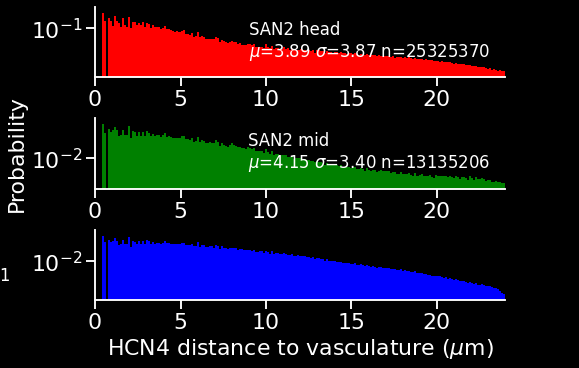

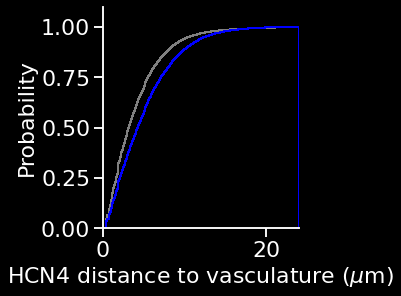

[array([5.930095 , 5.916741 , 5.930095 , ..., 1.7787815, 1.9887382,
        2.1419365], dtype=float32),
 array([14.058264, 14.164767, 14.281558, ...,  9.987688, 10.      ,
        10.035095], dtype=float32),
 array([4.5056396 , 4.892797  , 5.2815285 , ..., 0.7954953 , 0.39774764,
        0.39774764], dtype=float32)]

In [31]:
# SAN2
pathList = [
    '/media/cudmore/data1/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif',
    '/media/cudmore/data1/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif',
    ]

aicsPlot.plot_hcn4_dist_hist(pathList)

=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif
  making df with 50000 rows from original 2644482
=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif
  making df with 50000 rows from original 3229538
=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif
  making df with 50000 rows from original 3193203
  saving (150000, 4) dfFilePath: hcn4Dist.csv ... please wait
mean:3.45 sd:2.34 sem:0.00 n:2644482 min:0.62 max:24.00 median:3.00
mean:6.33 sd:4.71 sem:0.00 n:3229538 min:0.62 max:24.00 median:5.19
mean:7.49 sd:5.43 sem:0.00 n:3193203 min:0.62 max:24.00 median:6.21


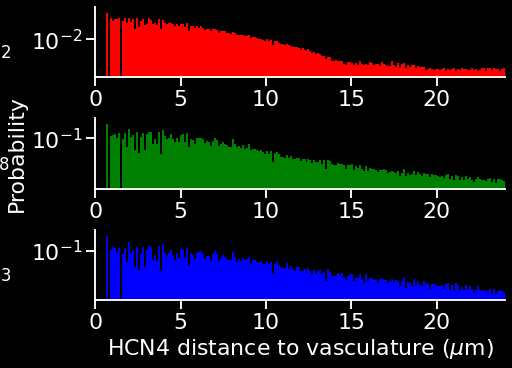

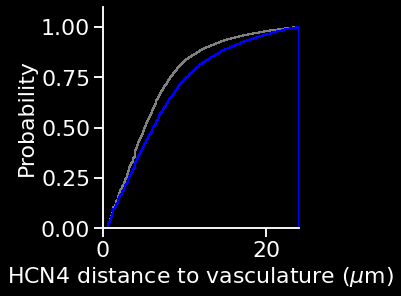

[array([6.6276455, 7.0511885, 7.502354 , ..., 5.593328 , 6.2148085,
        6.8362894], dtype=float32),
 array([8.978771 , 8.978771 , 9.000255 , ..., 2.63672  , 1.3896735,
        1.7578133], dtype=float32),
 array([2.       , 2.0943348, 2.1845999, ..., 6.1523466, 6.6064324,
        6.948367 ], dtype=float32)]

In [32]:
# SAN3
pathList = [
    '/media/cudmore/data1/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
    '/media/cudmore/data1/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
    ]
aicsPlot.plot_hcn4_dist_hist(pathList)

=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif
  making df with 50000 rows from original 6162298
=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif
  making df with 50000 rows from original 5478112
=== aicsMyocyteDistToVasc() /media/cudmore/data1/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif
  making df with 50000 rows from original 1744306
  saving (150000, 4) dfFilePath: hcn4Dist.csv ... please wait
mean:2.94 sd:1.92 sem:0.00 n:6162298 min:0.50 max:20.91 median:2.68
mean:3.21 sd:2.28 sem:0.00 n:5478112 min:0.50 max:23.99 median:2.69
mean:5.31 sd:5.11 sem:0.00 n:1744306 min:0.50 max:24.00 median:3.52


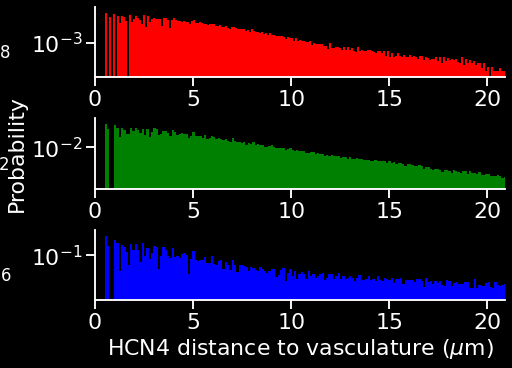

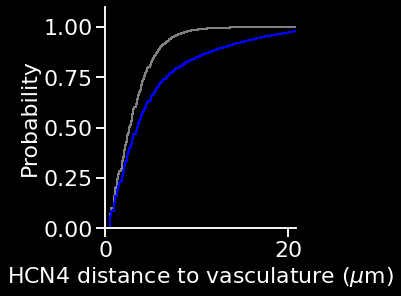

[array([ 6.1021276,  6.162592 ,  7.6319942, ..., 11.953131 , 11.8179455,
        11.702338 ], dtype=float32),
 array([ 9.337013,  9.481504,  8.534149, ..., 12.926802, 13.423986,
        13.506597], dtype=float32),
 array([0.4971847 , 0.70312536, 1.1117388 , ..., 3.8831365 , 4.2769446 ,
        4.690431  ], dtype=float32)]

In [34]:
# SAN4
pathList = [
    '/media/cudmore/data1/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif',
    '/media/cudmore/data1/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif',
    '/media/cudmore/data1/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif',
    ]
aicsPlot.plot_hcn4_dist_hist(pathList)